<p style="text-align: center; font-size: 30px;"><b>Term Frequency–Inverse Document Frequency</b></p>

# Term Frequency–Inverse Document Frequency

## Introduction

Imagine reading Emily Dickinson’s poems on a cold winter night. As you notice which words appear frequently across many poems and which carry deeper meaning within individual pieces, you are intuitively building a mental model similar to **TF-IDF** — a technique used to measure how important each word is within a specific document relative to an entire collection.

## What Is TF-IDF?

**Term Frequency–Inverse Document Frequency (TF-IDF)** is a statistical method used to evaluate the importance of a word in a document within a larger corpus. It is widely applied in NLP tasks such as:

* Ranking results in search engines
* Text summarization
* Building smarter chatbots

## Term-Document Matrix

Applying TF-IDF produces a **term-document matrix**, where:

* **Columns** → individual documents
* **Rows** → unique word tokens
* **Each cell** → TF-IDF score indicating how important a word is in that document

This matrix can be viewed as a refined version of **bag-of-words**, where frequency alone is not enough — common words are penalized and impactful words are highlighted.

Proceed to the next exercise to see how TF and IDF are calculated and combined into TF-IDF.


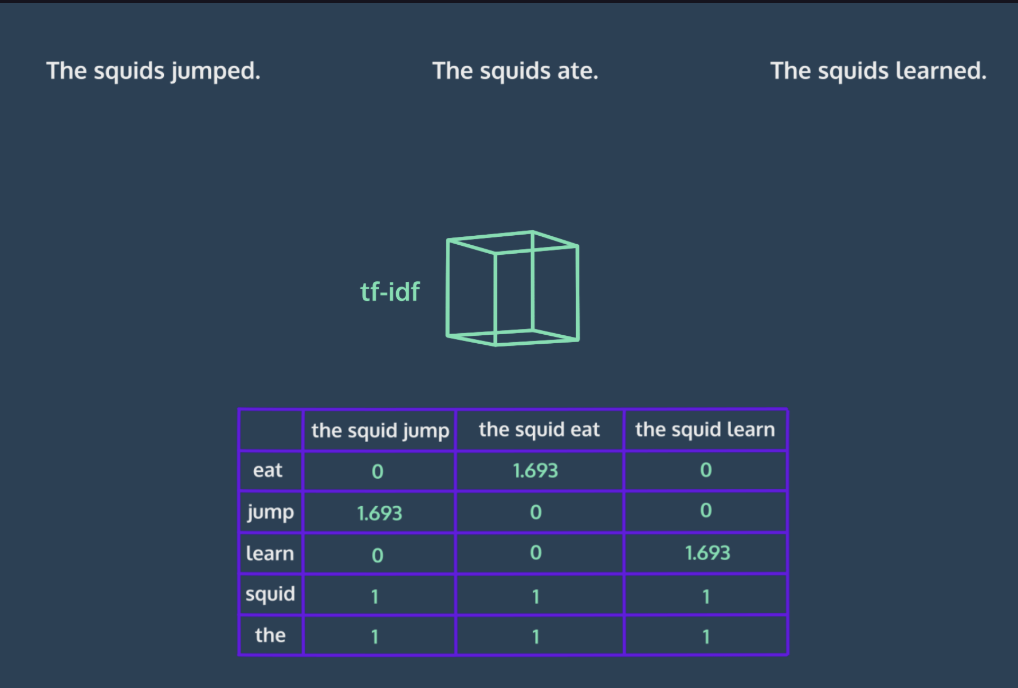


# What Is TF-IDF?

**Term Frequency–Inverse Document Frequency (TF-IDF)** is a numerical statistic that measures how important a word is within a specific document relative to a larger collection of documents (*corpus*).

Each word in each document receives a **TF-IDF score**:

* **High score** → the word is important for that document.
* **Low score** → the word appears frequently across many documents and is less informative.

## Purpose

Similar to the **bag-of-words** approach, TF-IDF captures how many times each word appears.
However, it adds an important adjustment:
words that appear **too often across the entire corpus** are **penalized**, since they carry less meaning (e.g., *the*, *and*, *is*).

## Components of TF-IDF

TF-IDF combines two metrics:

1. **Term Frequency (TF)** – How often a word appears in a specific document.
   Equivalent to word count in bag-of-words.

2. **Inverse Document Frequency (IDF)** – Measures how rare a word is across the corpus.
   It reduces the score of words that appear in many documents.

## Why Use TF-IDF?

By combining TF and IDF, TF-IDF highlights words that are:

* **Frequent in one document**
* **Uncommon across the rest of the corpus**

This helps identify terms that best characterize each individual document.

We will explore **TF** and **IDF** separately in the next exercises.


In [1]:
# Step 1: Import necessary libraries and preprocessing function
from utils.preprocessing1 import preprocess_text
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 2: Define sample documents
document_1 = "This is a sample sentence!"
document_2 = "This is my second sentence."
document_3 = "Is this my third sentence?"

# Step 3: Create a corpus from the documents
corpus = [document_1, document_2, document_3]

# Step 4: Preprocess documents before applying TF-IDF
processed_corpus = [preprocess_text(doc) for doc in corpus]

# Step 5: Initialize and fit TfidfVectorizer (no normalization)
vectorizer = TfidfVectorizer(norm=None)
tf_idf_scores = vectorizer.fit_transform(processed_corpus)

# Step 6: Retrieve vocabulary and create index for DataFrame
feature_names = vectorizer.get_feature_names_out()
corpus_index = [n for n in processed_corpus]

# Step 7: Create and print term-document matrix as a DataFrame
df_tf_idf = pd.DataFrame(tf_idf_scores.T.todense(), index=feature_names, columns=corpus_index)
print(df_tf_idf)

# Step 8: Try modifying document_1, document_2, and document_3 to observe TF-IDF changes

          this be a sample sentence  this be my second sentence  \
be                         1.000000                    1.000000   
my                         0.000000                    1.287682   
sample                     1.693147                    0.000000   
second                     0.000000                    1.693147   
sentence                   1.000000                    1.000000   
third                      0.000000                    0.000000   
this                       1.000000                    1.000000   

          be this my third sentence  
be                         1.000000  
my                         1.287682  
sample                     0.000000  
second                     0.000000  
sentence                   1.000000  
third                      1.693147  
this                       1.000000  


In [2]:
# Step 2: Define sample documents
document_1 = "This is a sample sample sentence!"
document_2 = "This is my second sentence."
document_3 = "Is this my third sentence?"

# Step 3: Create a corpus from the documents
corpus = [document_1, document_2, document_3]

# Step 4: Preprocess documents before applying TF-IDF
processed_corpus = [preprocess_text(doc) for doc in corpus]

# Step 5: Initialize and fit TfidfVectorizer (no normalization)
vectorizer = TfidfVectorizer(norm=None)
tf_idf_scores = vectorizer.fit_transform(processed_corpus)

# Step 6: Retrieve vocabulary and create index for DataFrame
feature_names = vectorizer.get_feature_names_out()
corpus_index = [n for n in processed_corpus]

# Step 7: Create and print term-document matrix as a DataFrame
df_tf_idf = pd.DataFrame(tf_idf_scores.T.todense(), index=feature_names, columns=corpus_index)
print(df_tf_idf)

# Step 8: Try modifying document_1, document_2, and document_3 to observe TF-IDF changes

          this be a sample sample sentence  this be my second sentence  \
be                                1.000000                    1.000000   
my                                0.000000                    1.287682   
sample                            3.386294                    0.000000   
second                            0.000000                    1.693147   
sentence                          1.000000                    1.000000   
third                             0.000000                    0.000000   
this                              1.000000                    1.000000   

          be this my third sentence  
be                         1.000000  
my                         1.287682  
sample                     0.000000  
second                     0.000000  
sentence                   1.000000  
third                      1.693147  
this                       1.000000  


# Term Frequency–Inverse Document Frequency

## Breaking It Down Part I: Term Frequency

The first component of TF-IDF is **Term Frequency (TF)** — a measure of how many times a word appears in a specific document within the corpus.

This is identical to the **bag-of-words** approach:
more appearances → higher importance within that document.

## Purpose of Term Frequency

TF captures the intuition that frequently occurring words in **one document** are likely relevant to its meaning.

## Example – Emily Dickinson

Consider the stanza from *I'm Nobody! Who are you?*:

```
I'm nobody! Who are you?
Are you nobody, too?
Then there's a pair of us — don't tell!
They'd banish us, you know.
```

From this stanza:

* “you” appears **3 times**
* “nobody”, “are”, and “us” each appear **2 times**
* the other words appear **once**

Looking at these frequencies alone already gives an idea of the stanza’s thematic focus.

## Calculating Term Frequency in Python

Using `CountVectorizer` from `scikit-learn`, term frequency is obtained by:

* Initializing the vectorizer
* Fitting and transforming the document to return the term counts

```python
vectorizer = CountVectorizer()
term_frequencies = vectorizer.fit_transform([stanza])
```

This produces a **term-document matrix** where each word receives its frequency value — the foundation for computing TF-IDF.


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Step 2: Store the poem in the variable 'poem'
poem = '''
Success is counted sweetest
By those who ne'er succeed.
To comprehend a nectar
Requires sorest need.

Not one of all the purple host
Who took the flag to-day
Can tell the definition,
So clear, of victory,

As he, defeated, dying,
On whose forbidden ear
The distant strains of triumph
Break, agonized and clear!'''

# Step 3: Manually count the occurrences of the word "clear" and save to clear_count
clear_count = 2

# Step 4: Preprocess the poem text
processed_poem = preprocess_text(poem)

# Step 5: Initialize CountVectorizer and compute term frequencies
vectorizer = CountVectorizer()
term_frequencies = vectorizer.fit_transform([processed_poem])

# Step 6: Display the vocabulary of unique terms
feature_names = vectorizer.get_feature_names_out()

# Step 7: Create and print the term-frequency matrix
df_term_frequencies = pd.DataFrame(term_frequencies.T.todense(), index=feature_names, columns=['Term Frequency'])
print(df_term_frequencies)

            Term Frequency
agonize                  1
all                      1
and                      1
be                       1
break                    1
by                       1
can                      1
clear                    2
comprehend               1
count                    1
day                      1
defeat                   1
definition               1
die                      1
distant                  1
ear                      1
er                       1
flag                     1
forbid                   1
he                       1
host                     1
ne                       1
nectar                   1
need                     1
not                      1
of                       3
on                       1
one                      1
purple                   1
require                  1
so                       1
sorest                   1
strain                   1
succeed                  1
success                  1
sweet                    1
t

# Breaking It Down Part II: Inverse Document Frequency

The second component of TF-IDF is **Inverse Document Frequency (IDF)**. Its purpose is to penalize words that appear **too frequently across the entire corpus**, since highly common words give **less useful insight** into any specific document.

## Why IDF Matters

Words like **“the”**, **“go”**, or **“is”** might appear often in many documents — but they don’t help us understand what makes one document unique.
IDF **downweights** these common terms and amplifies words that appear in **fewer documents**, making them better indicators of document-specific meaning.

## IDF Formula

The inverse document frequency of a term ( t ) can be calculated as:

$$
\text{IDF}(t) = \log\left( \frac{\text{Total number of documents}}{\text{Number of documents with term } t} \right)
$$

As the denominator increases (meaning the term appears in more documents), the IDF value **decreases** — this is due to the nature of the logarithm function.

## How to Compute IDF in Python

Using `scikit-learn`, we can compute IDF with `TfidfTransformer`:

```python
transformer = TfidfTransformer(norm=None)
transformer.fit(term_frequencies)
inverse_doc_frequency = transformer.idf_
```

This process:

* Initializes a `TfidfTransformer`
* Fits it on a term-document matrix
* Retrieves IDF values through the `.idf_` attribute (stored as a NumPy array)

Together with **Term Frequency**, IDF forms the foundation of the full TF-IDF metric.


In [4]:
# Step 1: Import necessary libraries and data
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from utils.term_frequency import term_frequencies, feature_names, df_term_frequencies

# Step 2: Display the term frequency matrix
print(df_term_frequencies)

# Step 3: Create a TfidfTransformer object named 'transformer'
transformer = TfidfTransformer(norm=None)

# Step 4: Fit the transformer on the term frequencies matrix
transformer.fit(term_frequencies)

# Step 5: Store the inverse document frequency values
idf_values = transformer.idf_

# Step 6: Display the IDF values as a DataFrame
try:
    df_idf = pd.DataFrame(idf_values, index=feature_names, columns=['Inverse Document Frequency'])
    print(df_idf)
except:
    pass

         Poem 1  Poem 2  Poem 3  Poem 4  Poem 5  Poem 6
abash         0       0       0       0       1       0
across        0       0       0       1       0       0
admire        0       0       1       0       0       0
again         0       0       0       1       0       0
agonize       1       0       0       0       0       0
...         ...     ...     ...     ...     ...     ...
word          0       0       0       0       1       0
wreck         0       0       0       1       0       0
yet           0       0       0       0       1       0
you           0       0       3       0       0       0
your          0       0       1       0       0       0

[173 rows x 6 columns]
         Inverse Document Frequency
abash                      2.252763
across                     2.252763
admire                     2.252763
again                      2.252763
agonize                    2.252763
...                             ...
word                       2.252763
wreck           

# Putting It All Together: TF-IDF

Now that both **Term Frequency (TF)** and **Inverse Document Frequency (IDF)** are defined, we can compute **TF-IDF**, a score that reflects how important each word is to a specific document within a corpus.

## TF-IDF Formula

For any term ( t ) in document ( d ):

$$
\text{tfidf}(t, d) = \text{tf}(t, d) \cdot \text{idf}(t, \text{corpus})
$$

Where:

* ( \text{tf}(t, d) ) → frequency of term ( t ) in document ( d )
* ( \text{idf}(t, \text{corpus}) ) → how rare the term is across all documents

## Why TF-IDF Works

TF highlights terms that matter within **one document**,
IDF penalizes terms that appear across **many documents**,
so their product identifies words that are both **frequent and meaningful** in a specific document.

## Computing TF-IDF with scikit-learn

```python
vectorizer = TfidfVectorizer(norm=None)
tfidf_vectorizer = vectorizer.fit_transform(corpus)
```

This process:

* Initializes `TfidfVectorizer`
* Fits and transforms the corpus into a **term-document matrix** of TF-IDF scores

Each row corresponds to a term, and each column corresponds to a document — giving a complete map of term relevance across the corpus.


In [5]:
# Step 1: Import required libraries and poem data
import pandas as pd
from utils.poems import poems
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 2: Preprocess each poem in the corpus
processed_poems = [preprocess_text(poem) for poem in poems]

# Step 3: Initialize the TfidfVectorizer with norm=None
vectorizer = TfidfVectorizer(norm=None)

# Step 4: Fit and transform the vectorizer on the preprocessed poems
tfidf_scores = vectorizer.fit_transform(processed_poems)

# Step 5: Retrieve the vocabulary of unique terms
feature_names = vectorizer.get_feature_names_out()

# Step 6: Create corpus index labels for the DataFrame
corpus_index = [f"Poem {i+1}" for i in range(len(poems))]

# Step 7: Create and display the TF-IDF matrix as a DataFrame
try:
    df_tf_idf = pd.DataFrame(tfidf_scores.T.todense(), index=feature_names, columns=corpus_index)
    print(df_tf_idf)
except:
    pass

           Poem 1  Poem 2    Poem 3    Poem 4    Poem 5  Poem 6
abash    0.000000     0.0  0.000000  0.000000  2.252763     0.0
across   0.000000     0.0  0.000000  2.252763  0.000000     0.0
admire   0.000000     0.0  2.252763  0.000000  0.000000     0.0
again    0.000000     0.0  0.000000  2.252763  0.000000     0.0
agonize  2.252763     0.0  0.000000  0.000000  0.000000     0.0
...           ...     ...       ...       ...       ...     ...
word     0.000000     0.0  0.000000  0.000000  2.252763     0.0
wreck    0.000000     0.0  0.000000  2.252763  0.000000     0.0
yet      0.000000     0.0  0.000000  0.000000  2.252763     0.0
you      0.000000     0.0  6.758289  0.000000  0.000000     0.0
your     0.000000     0.0  2.252763  0.000000  0.000000     0.0

[173 rows x 6 columns]


# Converting Bag-of-Words to TF-IDF

Sometimes you may already have a **bag-of-words matrix** and want to convert it into **TF-IDF scores** without recalculating everything from scratch. This is exactly what `TfidfTransformer` in scikit-learn is designed for.

## Step 1: Initialize the Transformer

```python
tf_idf_transformer = TfidfTransformer(norm=False)
```

This prepares the transformer to convert term frequencies into TF-IDF values.

## Step 2: Apply Transformation

Given an existing bag-of-words matrix named `count_matrix`, you can compute TF-IDF scores like this:

```python
tf_idf_scores = tfidf_transformer.fit_transform(count_matrix)
```

## Key Insight

This follows the same logic used to compute IDF earlier:

* **Term frequencies** (bag-of-words counts)
* **Inverse document frequency**
* Then multiplies them to generate **TF-IDF values**

This method allows you to reuse existing bag-of-words representations and upgrade them to TF-IDF efficiently — without rebuilding everything from scratch.


In [6]:
# Step 1: Import required libraries and data
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from utils.term_frequency import bow_matrix, feature_names, df_bag_of_words, corpus_index

# Step 2: Display the bag-of-words matrix
print(df_bag_of_words)

# Step 3: Initialize a TfidfTransformer with norm=None
transformer = TfidfTransformer(norm=None)

# Step 4: Fit and transform the bag-of-words matrix into TF-IDF scores
tfidf_scores = transformer.fit_transform(bow_matrix)

# Step 5: Create and display the TF-IDF DataFrame
try:
    df_tf_idf = pd.DataFrame(tfidf_scores.T.todense(), index=feature_names, columns=corpus_index)
    print(df_tf_idf)
except:
    pass

         Poem 1  Poem 2  Poem 3  Poem 4  Poem 5  Poem 6
abash         0       0       0       0       1       0
across        0       0       0       1       0       0
admire        0       0       1       0       0       0
again         0       0       0       1       0       0
agonize       1       0       0       0       0       0
...         ...     ...     ...     ...     ...     ...
word          0       0       0       0       1       0
wreck         0       0       0       1       0       0
yet           0       0       0       0       1       0
you           0       0       3       0       0       0
your          0       0       1       0       0       0

[173 rows x 6 columns]
           Poem 1  Poem 2    Poem 3    Poem 4    Poem 5  Poem 6
abash    0.000000     0.0  0.000000  0.000000  2.252763     0.0
across   0.000000     0.0  0.000000  2.252763  0.000000     0.0
admire   0.000000     0.0  2.252763  0.000000  0.000000     0.0
again    0.000000     0.0  0.000000  2.252763  0

# Review: TF-IDF Summary

“Hope is the thing with feathers
That perches in the soul
And sings the tune without the words
And never stops at all.”

Just as Emily Dickinson writes about hope and persistence, you’ve reached the end of this lesson on **TF-IDF**. Let’s summarize the key ideas:

* **TF-IDF (Term Frequency–Inverse Document Frequency)** is a numerical statistic that measures how important a word is to each document in a collection (corpus).
* It combines **two components**:

  * **Term Frequency (TF)**: how often a word appears in a single document.
    This is the same as the word count used in the **bag-of-words** model.
  * **Inverse Document Frequency (IDF)**: how rare or common a word is across the **entire corpus**.
    Words that appear in many documents (like “the”) get a lower IDF score.
* **TF-IDF score** for a term ( t ) in document ( d ) is:
  $$
  \text{tfidf}(t, d) = \text{tf}(t, d) \cdot \text{idf}(t, \text{corpus})
  $$
* **Interpretation**:

  * High TF + High IDF → term is frequent **in that document** but rare **in the corpus** → highly informative.
  * High TF + Low IDF → term is common everywhere → less informative.
* In **scikit-learn**, you can compute:

  * **Term Frequency (bag-of-words)** with `CountVectorizer`
  * **Inverse Document Frequency** with `TfidfTransformer`
  * **TF-IDF directly** with `TfidfVectorizer`

With these tools, you can:

* Compare documents,
* Build search engines and summarizers,
* And better understand which words truly matter in a text.


In [9]:
# Step 1: Import necessary libraries and poem data
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from utils.raven import the_raven_stanzas

# Step 2: Print the first stanza
print(the_raven_stanzas[0])

# Step 3: Preprocess the stanzas into a clean corpus
processed_stanzas = [preprocess_text(stanza) for stanza in the_raven_stanzas]

# Step 4: Initialize the TfidfVectorizer with norm=None
vectorizer = TfidfVectorizer(norm=None)

# Step 5: Fit and transform the vectorizer on the preprocessed stanzas
tfidf_scores = vectorizer.fit_transform(processed_stanzas)

# Step 6: Retrieve the vocabulary of unique terms
feature_names = vectorizer.get_feature_names_out()

# Step 7: Create stanza index labels
stanza_index = [f"Stanza {i+1}" for i in range(len(the_raven_stanzas))]

# Step 8: Create and display the TF-IDF matrix as a DataFrame
try:
    df_tf_idf = pd.DataFrame(tfidf_scores.T.todense(), index=feature_names, columns=stanza_index)
    print(df_tf_idf)
except:
    pass



Once upon a midnight dreary, while I pondered, weak and weary,
 Over many a quaint and curious volume of forgotten lore,
 While I nodded, nearly napping, suddenly there came a tapping,
 As of some one gently rapping, rapping at my chamber door
        Stanza 1  Stanza 2  Stanza 3  Stanza 4  Stanza 5   Stanza 6  Stanza 7  \
above        0.0       0.0  0.000000       0.0       0.0   0.000000       0.0   
adore        0.0       0.0  0.000000       0.0       0.0   0.000000       0.0   
again        0.0       0.0  0.000000       0.0       0.0   0.000000       0.0   
agree        0.0       0.0  0.000000       0.0       0.0   0.000000       0.0   
ah           0.0       0.0  3.079442       0.0       0.0   0.000000       0.0   
...          ...       ...       ...       ...       ...        ...       ...   
wretch       0.0       0.0  0.000000       0.0       0.0   0.000000       0.0   
yet          0.0       0.0  0.000000       0.0       0.0   0.000000       0.0   
yore         0.0       0.0